In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df_cle = pd.read_csv('/Users/votri/Downloads/Pakula_ML/HeartDiseasePakula/Data/Cleveland Imputed Data.csv')
df_cle.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


### Split the data

In [3]:
Y = df_cle.iloc[:,13]
X = df_cle.drop(df_cle.columns[13], axis=1)

In [4]:
print(X)
print(Y)

        0    1    2      3      4    5    6      7    8    9   10   11   12
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0  0.0  3.0

[303 rows x 13 columns]
0      0.0
1      2.0
2      1.0
3      0.0
4      0.0
      ..

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  

### Decision Tree Classifier

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
Y_predictions = clf.predict(X_test)

### Confusion Matrix and Accuracy

In [9]:
cm = confusion_matrix(Y_predictions, Y_test)
print(cm)

[[38  9  3  0  0]
 [ 6  2  6  3  1]
 [ 4  1  1  4  1]
 [ 1  5  1  1  2]
 [ 0  0  0  2  0]]


In [10]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [11]:
accuracy(cm)

0.46153846153846156

### Tree Visualization

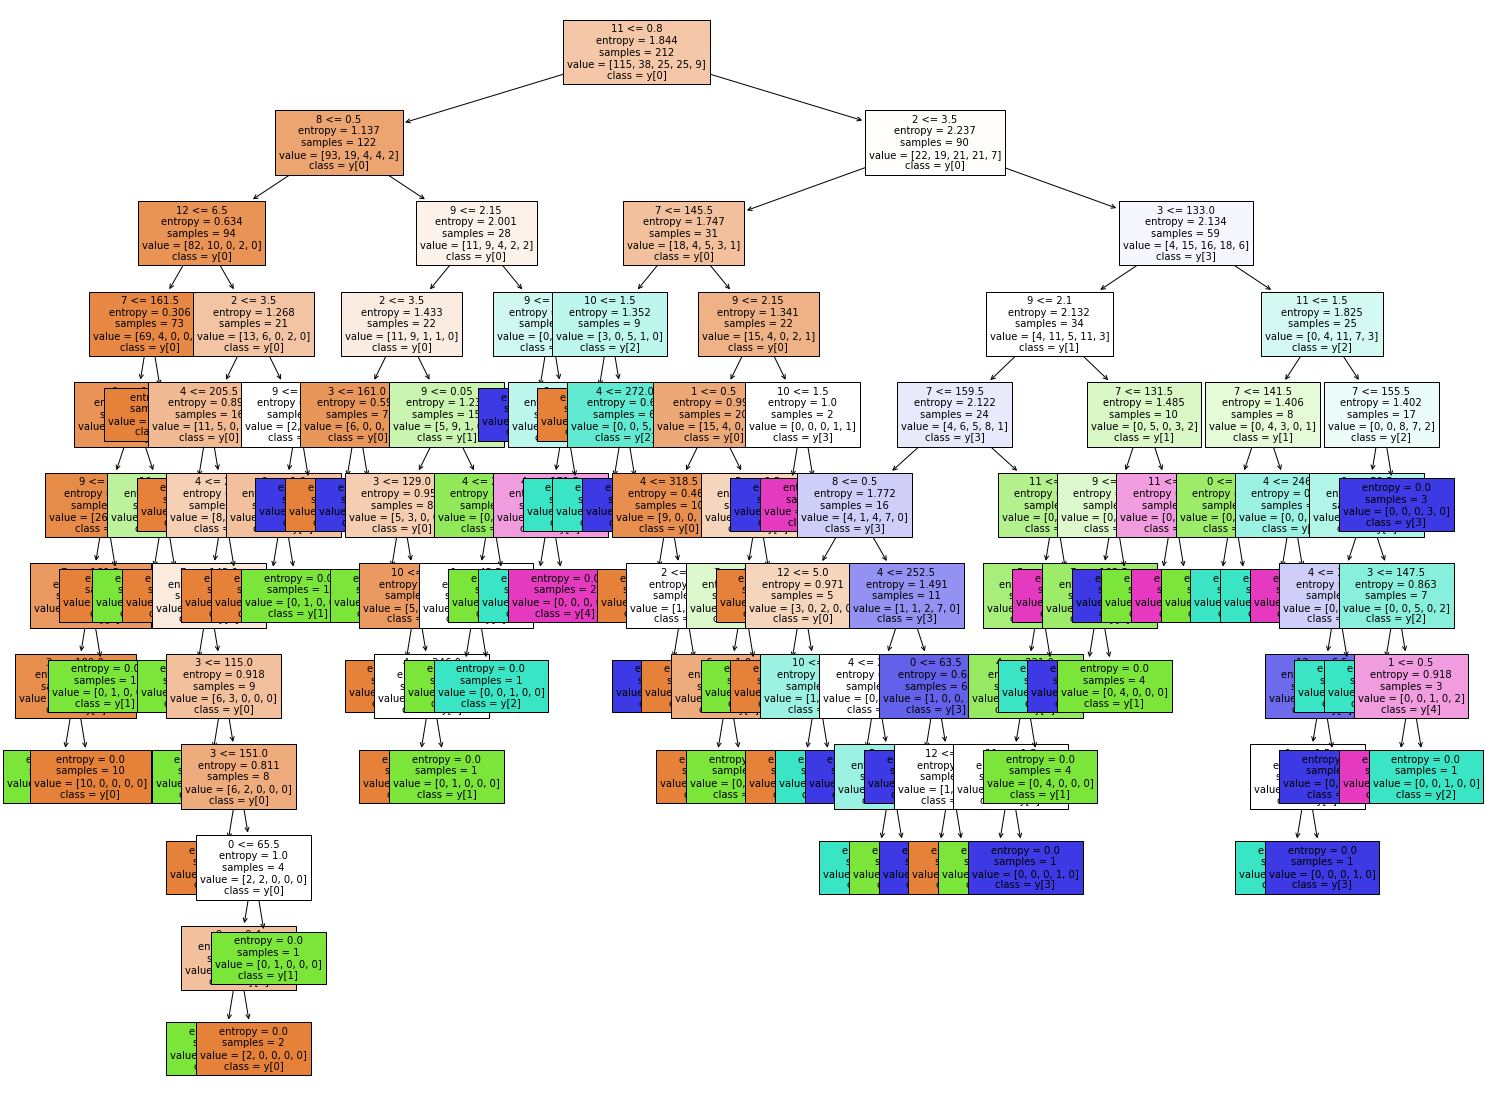

In [12]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()